In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv(r"D:\Stu\PGP Data Science\Term 2\AIF\LR_Assignment\application_train.csv")

In [7]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
x = missing_values_table(df_train)
x

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [12]:
x_train_modify = x[x['% of Total Values']< 30]
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [13]:
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [14]:
x_train_modify.iloc[:,0]

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
Name: Missing Values, dtype: int64

In [15]:
type(x_train_modify)

pandas.core.frame.DataFrame

In [17]:
df_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

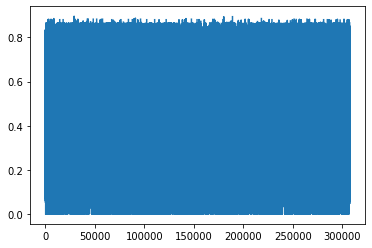

In [18]:
df_train['EXT_SOURCE_3'].plot()

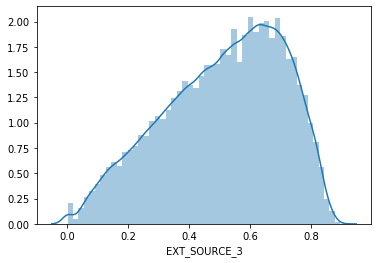

In [19]:
sns.distplot(df_train['EXT_SOURCE_3'])

In [20]:
df_train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [21]:
df_train['EXT_SOURCE_3'].median()

0.5352762504724826

In [24]:
df_train[('EXT_SOURCE_3_impute')] = df_train['EXT_SOURCE_3'].fillna(df_train['EXT_SOURCE_3'].median())

In [25]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [26]:
df_train.drop(['EXT_SOURCE_3'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.218859
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.661024


In [27]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [ ]:
## Imputation

In [29]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_WEEK_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])

In [30]:
df_train.drop(['AMT_REQ_CREDIT_BUREAU_WEEK'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0


In [31]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0


In [37]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_DAY_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])

In [38]:
df_train.head()
df_train.drop(['AMT_REQ_CREDIT_BUREAU_DAY'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0,0.0


In [40]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_MON_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

In [44]:
df_train[('AMT_REQ_CREDIT_BUREAU_QRT_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

In [45]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0


In [47]:
df_train[('AMT_REQ_CREDIT_BUREAU_HOUR_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0


In [49]:
df_train[('AMT_REQ_CREDIT_BUREAU_YEAR_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0


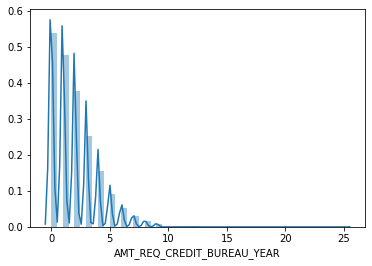

In [50]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [51]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,1.0,0.218859,0.0,0.0,1.0,0.0,1.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_train.drop(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON' ], axis = 1, inplace=True) 
df_train.drop(['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_YEAR' ], axis = 1, inplace=True) 

In [53]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0.218859,0.0,0.0,1.0,0.0,1.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_train[('NAME_TYPE_SUITE_impute')] = df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0])
df_train.head()
	

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied


In [64]:
df_train[('DEF_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,0.262949,351000.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.622246,1129500.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.555912,135000.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,Unaccompanied,2.0,0.0,2.0,0.650442,297000.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.322738,513000.0,0.0


In [59]:
df_train[('OBS_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0


In [60]:
df_train[('DEF_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0


In [61]:
df_train[('OBS_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0


In [62]:
df_train[('EXT_SOURCE_2_impute')] = df_train['EXT_SOURCE_2'].fillna(df_train['EXT_SOURCE_2'].median())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0,0.0,2.0,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.322738


In [63]:
df_train[('AMT_GOODS_PRICE_impute')] = df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,0.262949,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.622246,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.555912,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,Unaccompanied,2.0,0.0,2.0,0.650442,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.322738,513000.0


In [65]:
df_train.drop(['NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE'], axis = 1, inplace=True)

In [66]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,0.262949,351000.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.622246,1129500.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.555912,135000.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,Unaccompanied,2.0,0.0,2.0,0.650442,297000.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.322738,513000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.681632,225000.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.115992,225000.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,1.0,1.0,Unaccompanied,6.0,0.0,6.0,0.535722,585000.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.514163,319500.0,0.0
